In [2]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 


# change dpi of plots to 300
plt.rcParams['figure.dpi'] = 200

<!-- 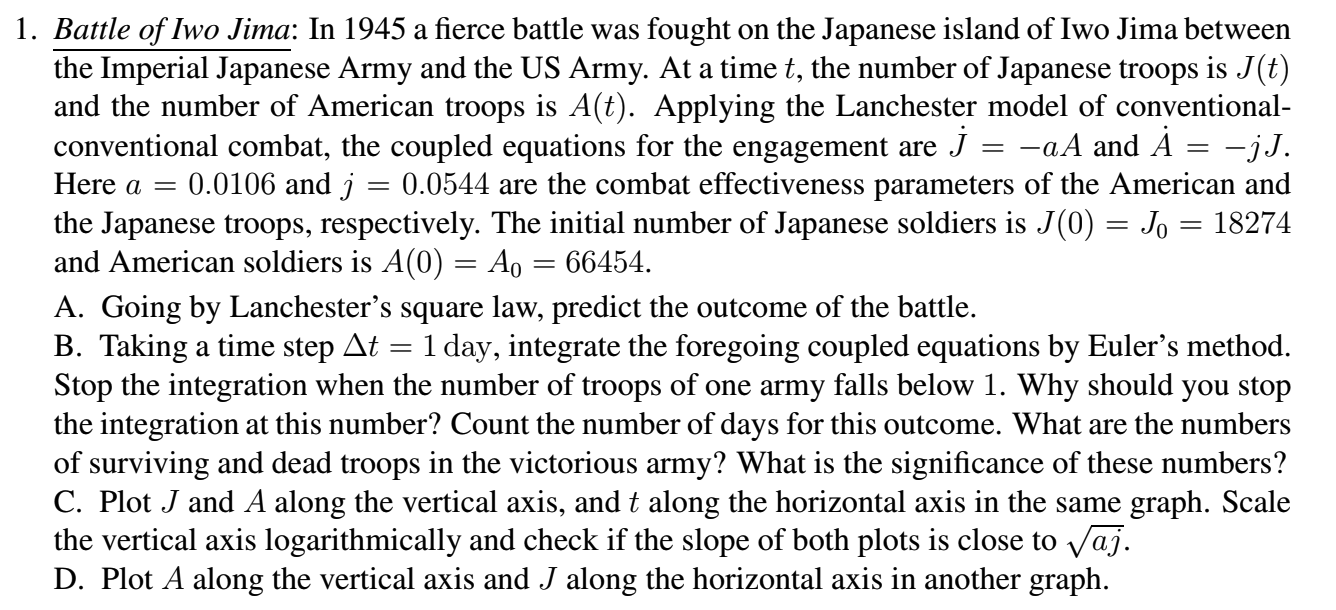 -->

Number of days to win the war:  32


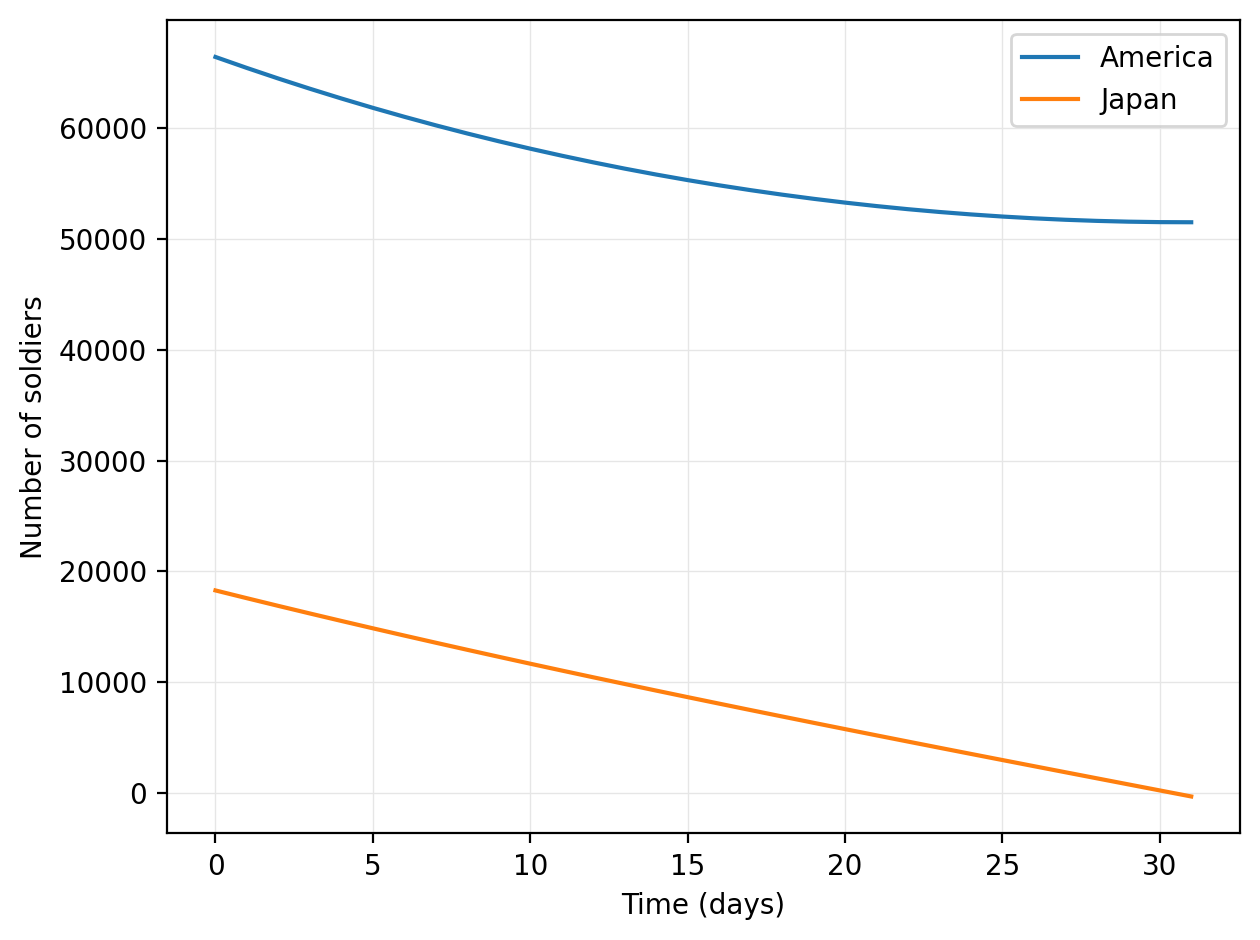

Number of casualties in America:  14927.12657790578
Number of casualties in Japan:  18609.038686143194


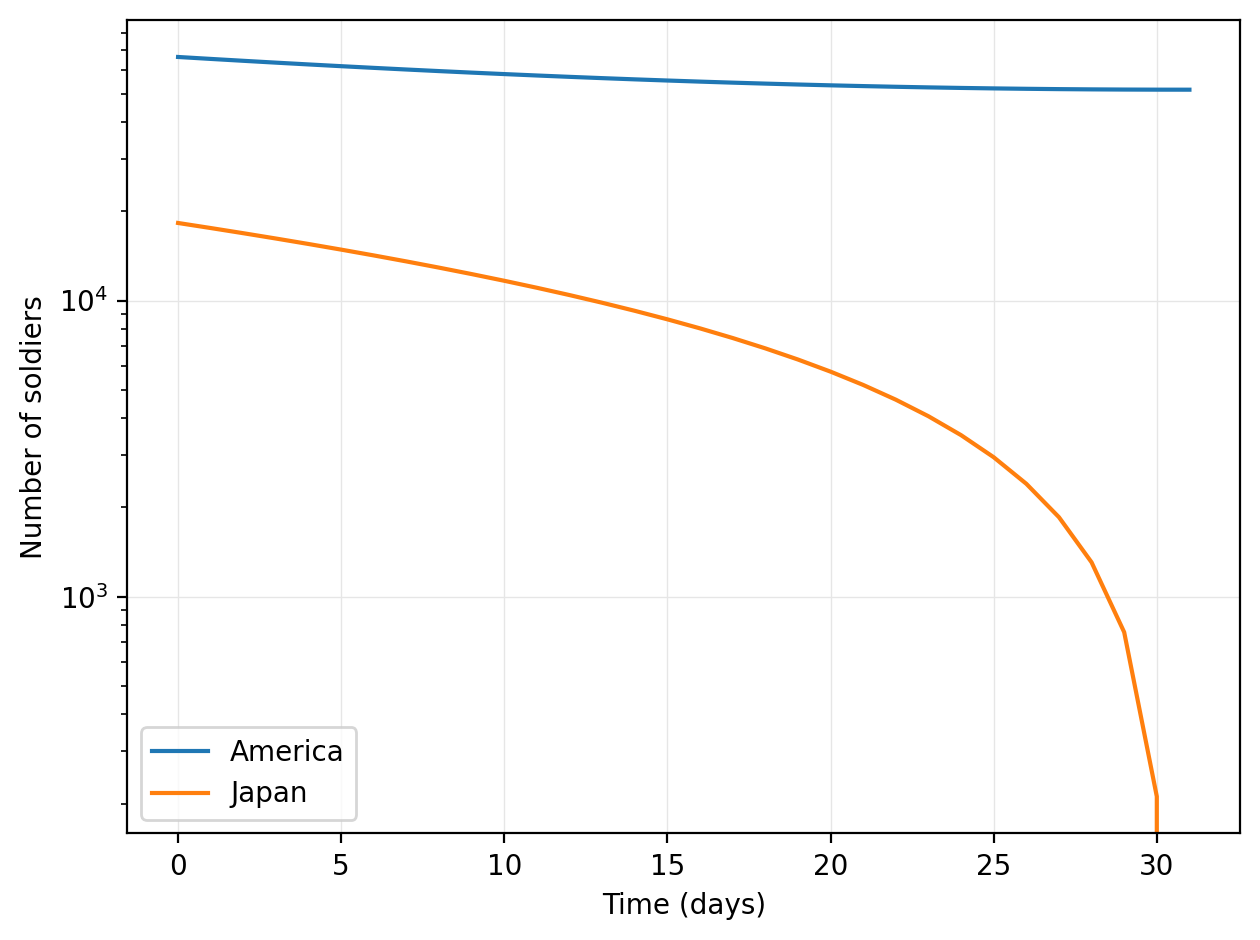

Expected Slope :  0.024013329631685815


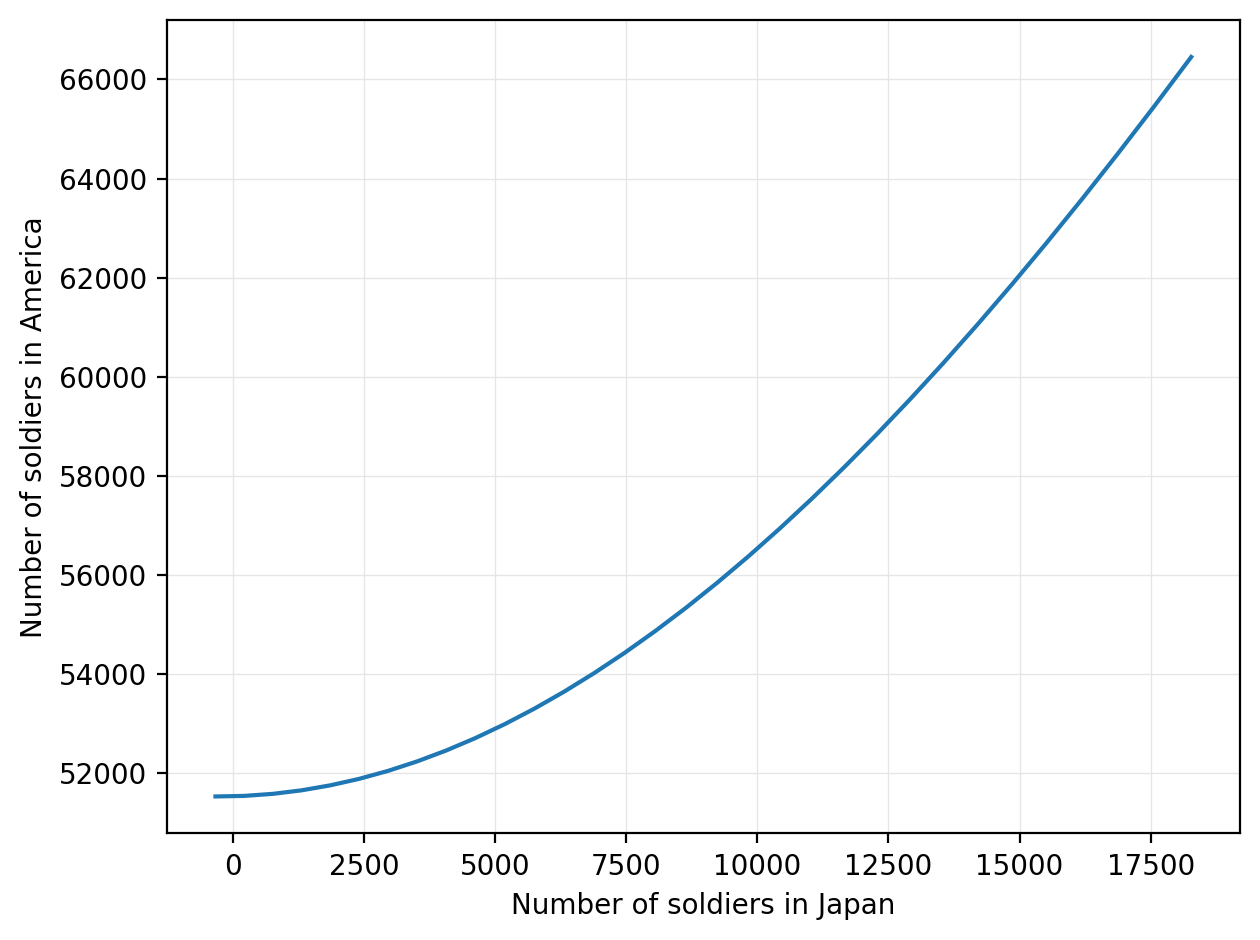

Slope America :  -0.01220764749531364
Slope Natural Log America :  -0.007950202918438815
Slope Japan :  -0.04996126296972335
211.26799770920434


In [5]:
# Lanchester model for war simulation
a = 0.0106; j = 0.0544; 
J_0 = 18274; A_0 = 66454;

def Rate_Japan(A):
    return -a*A
def Rate_America(J):
    return -j*J

# Integrate to get the number of soldiers at each time step with delta t = 1
def Integrate(A_0, J_0, Rate_America, Rate_Japan):
    A = []; 
    J = [];
    A.append(A_0); J.append(J_0)
    t = 0
    # Stop when Number of soldiers in Japan or America is less than 1
    while A[t] > 1 and J[t] > 1:
        A.append(A[t] + Rate_America(J[t]))
        J.append(J[t] + Rate_Japan(A[t]))
        t = t + 1
    return A, J

# Integrate to get the number of soldiers at each time step with delta t = 1
A, J = Integrate(A_0, J_0, Rate_America, Rate_Japan)

print('Number of days to win the war: ', len(A))
# Plot the results vs time

plt.plot(A, label = 'America')
plt.plot(J, label = 'Japan')
plt.xlabel('Time (days)')
plt.ylabel('Number of soldiers')
plt.legend()
plt.tight_layout()
plt.grid(color='0.9', linestyle='-', linewidth=0.5)
plt.show()

# Print number of casualties in each country
print('Number of casualties in America: ', A_0 - A[-1])
print('Number of casualties in Japan: ', J_0 - J[-1])


# Plot log scale plot of A vs J
plt.plot(A, label = 'America')
plt.plot(J, label = 'Japan')
plt.xlabel('Time (days)')
plt.ylabel('Number of soldiers')
plt.yscale('log')
plt.legend()
plt.tight_layout()
# light grey grid lines
plt.grid(color='0.9', linestyle='-', linewidth=0.5)
plt.show()

print('Expected Slope : ', np.sqrt(a*j))
        
plt.plot(J, A) 
plt.xlabel('Number of soldiers in Japan')
plt.ylabel('Number of soldiers in America')
plt.tight_layout()
plt.grid(color='0.9', linestyle='-', linewidth=0.5)
plt.show()
    
print('Slope America : ', np.log(A[15]/A[0])/15)
# Slope with natural log base e instead of 10
print('Slope Natural Log America : ', np.log(A[-1]/A[0])/len(A))

print('Slope Japan : ', np.log(J[15]/J[0])/15)

print(J[30])
    

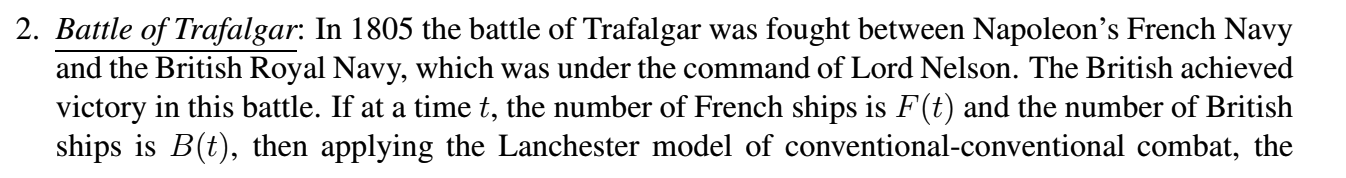
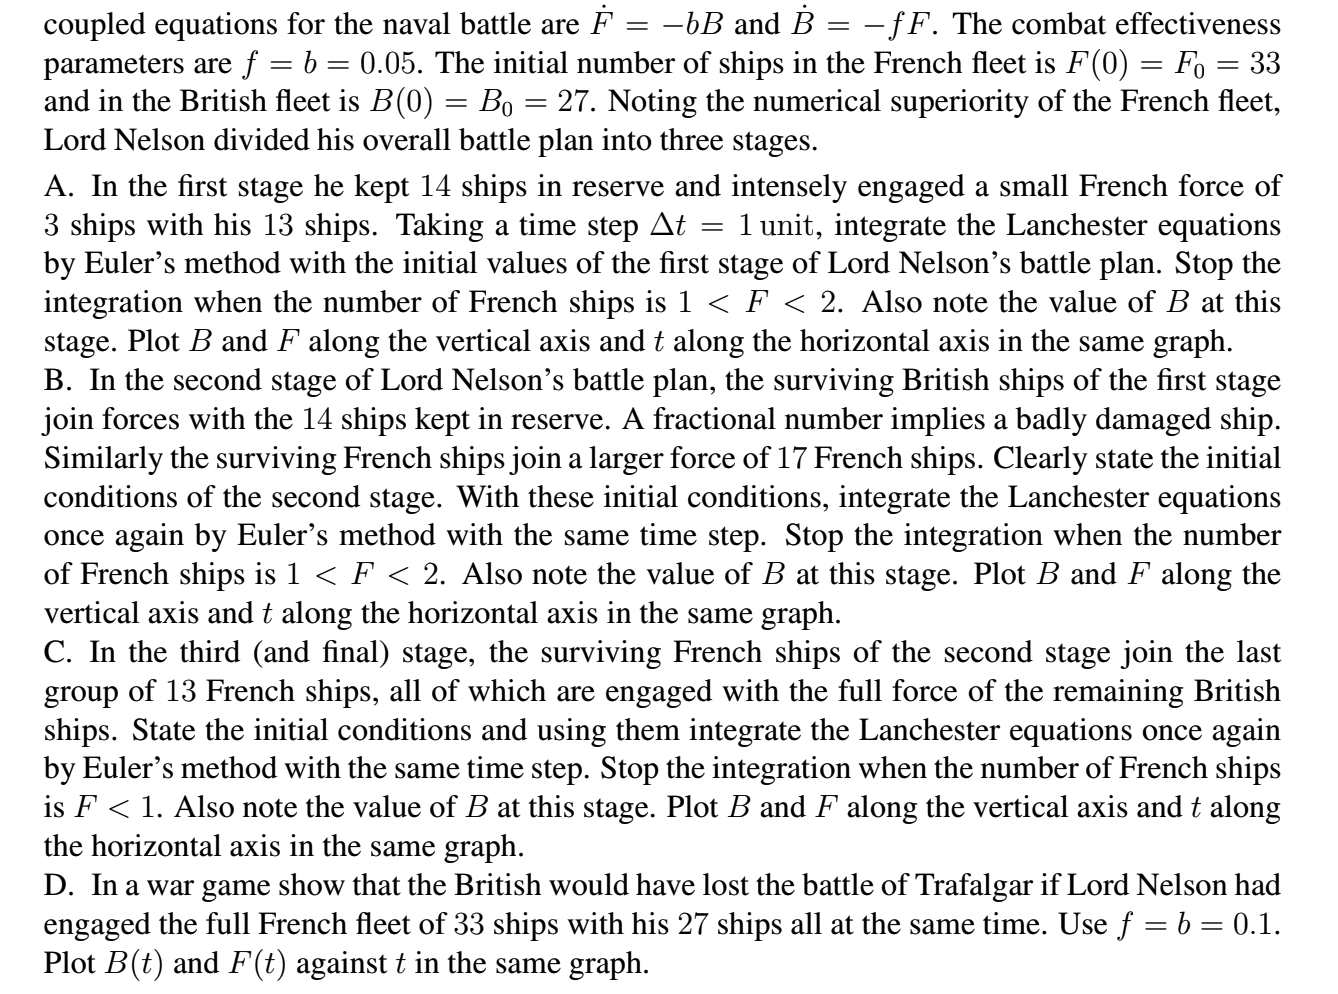

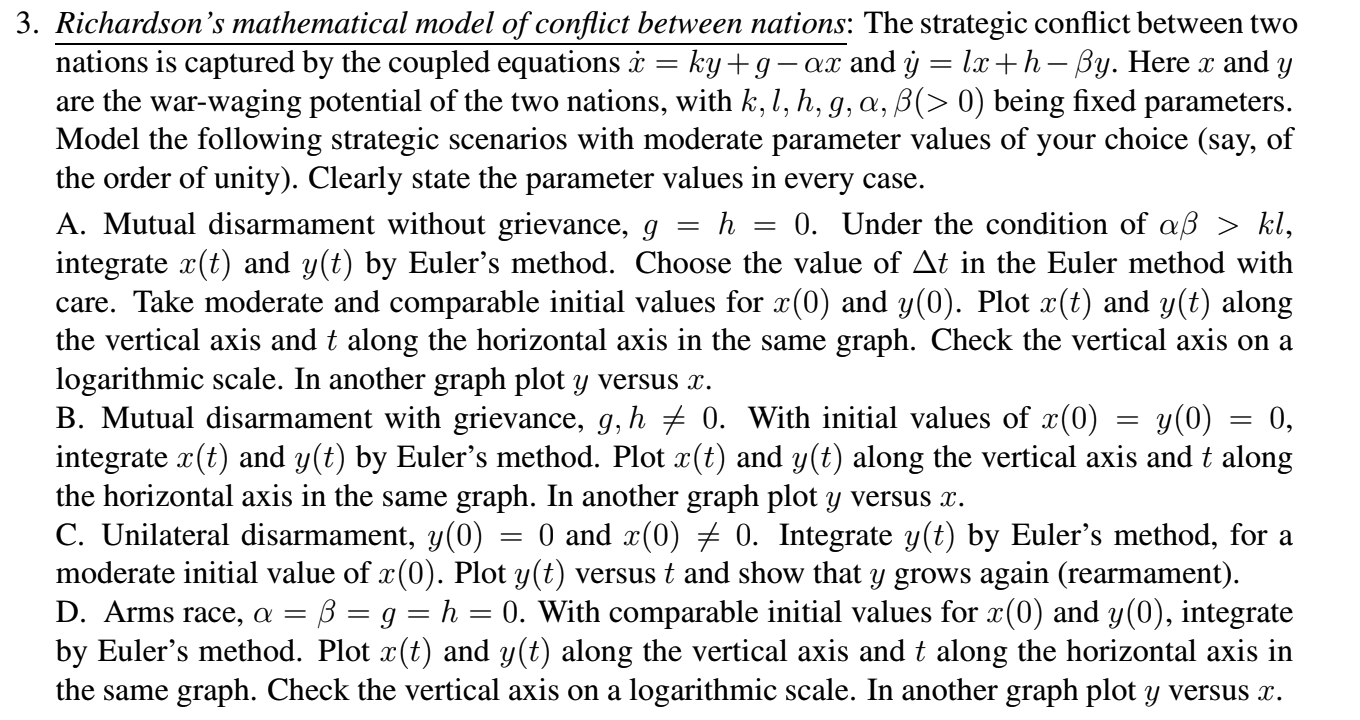

ValueError: x and y must have same first dimension, but have shapes (100000,) and (100002,)

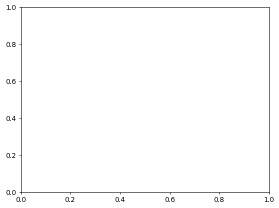

In [38]:
g = 0; h = 0;
alpha = 0.15; beta = 0.1; k = 0.1; l = 0.1; delt = 0.01;

def rate_x(x, y):
    return k*y + g - alpha*x

def rate_y(x, y):
    return l*x + h - beta*y

time = np.arange(0, 1000, delt)

def Integrate(X_0, Y_0, rate_x, rate_y, lim = 1000):
    X = []; 
    Y = [];
    X.append(X_0); Y.append(Y_0)
    t = 0
    day = 0
    # Stop when Number of soldiers in Japan or America is less than 1
    while X[t] >= 0 and Y[t] >= 0:
        X.append(X[t] + (rate_x(X[t], Y[t])*delt))
        Y.append(Y[t] + (rate_y(X[t], Y[t])*delt))
        t = t + 1
        day = day + delt
        if day > lim:
            break
        
    return X, Y

######################### Mutual Disarmament without Grievance #########################

X_0 = 10000; Y_0 = 20000;
X, Y = Integrate(X_0, Y_0, rate_x, rate_y)

plt.plot(time,X, label = 'X')
plt.plot(time,Y, label = 'Y')
plt.xlabel('Time (days)')
plt.ylabel('Number of soldiers')
plt.legend()
plt.show()

print('Number of casualties in X: ', X_0 - X[-1])
print('Number of casualties in Y: ', Y_0 - Y[-1])

############ Mutual Disarmament ############
g = 0.6; h = 0.8;
X_0 = 0; Y_0 = 0;

X, Y = Integrate(X_0, Y_0, rate_x, rate_y)

plt.plot(time,X, label = 'X')
plt.plot(time,Y, label = 'Y')
plt.xlabel('Time (days)')
plt.ylabel('Number of soldiers')
plt.legend()
plt.show()

############ Unilateral Disarmament ############
Y_0 = 0; 
X_0 = 10000;

X, Y = Integrate(X_0, Y_0, rate_x, rate_y)

plt.plot(time,X, label = 'X')
plt.plot(time,Y, label = 'Y')
plt.xlabel('Time (days)')
plt.ylabel('Number of soldiers')
plt.legend()
plt.show()

############ Arms Race ############
g = 0; h = 0; alpha = 0; beta = 0;

X_0 = 10000; Y_0 = 20000;

X, Y = Integrate(X_0, Y_0, rate_x, rate_y)

plt.plot(time,X, label = 'X')
plt.plot(time,Y, label = 'Y')
plt.xlabel('Time (days)')
plt.ylabel('Number of soldiers')
plt.legend()
plt.show()





